LASSO

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from log_linear_binary import E_lasso_bin
from optITR import optITR_lin_bin
import time
#As an example for linear case
# patiences = 10
# n_node = 50
# n_layer = 1
# t_nodes = 100
# t_fig = 50
# n_lr = 1e-3
# n_epoch = 1000
# s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')    
    val_data = gendata_Linear(200, 0.5,beta,gamma)
    train_data = gendata_Linear(800, 0.5,beta,gamma)
    St = E_lasso_bin(train_data, val_data, test_data,lam_min=-2,lam_max=0,K=5)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.052210000000000006
0.018931875237281702
0.002619217707405882
0.002054384043966807


In [3]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from log_linear_binary import E_lasso_bin
from optITR import optITR_lin_bin
from optITR import optITR_deep_bin
import time
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r') 
    val_data = gendata_Deep(200, 0.5)
    train_data = gendata_Deep(800, 0.5)
    St = E_lasso_bin(train_data, val_data, test_data,lam_min=-2,lam_max=0,K=5)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.30417999999999995
0.010848391585852725
0.09298695308064549
0.009340314773244537


RDL

In [4]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import RDL_bin
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')    
    val_data = gendata_Linear(200, 0.5,beta,gamma)
    train_data = gendata_Linear(800, 0.5,beta,gamma)
    res_rdl = RDL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10))
    d_est = res_rdl['itr_test']
    X_test = test_data['X']
    d_opt = X_test@(gamma-beta)>0 
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))
    #quality value 
    theta = np.vstack((beta,gamma))
    quality = X_test@theta.T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    
    Regret = V_opt - V_est
    regret[i] = Regret
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.054740000000000004
0.02071937257737309
0.0032850310209398235
0.0028085941908077084


In [5]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import RDL_bin
# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Deep(200, 0.5)
    train_data = gendata_Deep(800, 0.5)
    res_rdl = RDL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10))
    d_est = res_rdl['itr_test']
    X = test_data['X']
    g_X = test_data['g_X']
    h_X = test_data['h_X']
    # g_X =  np.cos(X[:,0]**2+2*X[:,1]**2+X[:,2]**3+np.sqrt(X[:,3]+1)*np.log(X[:,4]+2)/20)
        #A=1, influence h_X
    # h_X = X[:,0]/3 + np.exp(X[:,1])/4 + np.cos(X[:,2]* X[:,3])\
                # - (np.log(X[:,4]+2))/3 -1
    d_opt = (h_X-g_X)>0
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))

    
    quality = (np.vstack((g_X , h_X))).T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    Regret = V_opt - V_est
    regret[i] = Regret
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))


Results:e: 200
0.31773999999999997
0.01453452441602408
0.10256178955258928
0.009700749394618395


SDL

In [6]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import SDL_bin
import warnings
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']
warnings.filterwarnings('ignore')
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Linear(200, 0.5,beta,gamma)
    train_data = gendata_Linear(800, 0.5,beta,gamma)
    res_sdl = SDL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10),precompute=False)
    d_est = res_sdl['itr_test']
    X_test = test_data['X']
    d_opt = X_test@(gamma-beta)>0 
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))
    #quality value 
    theta = np.vstack((beta,gamma))
    quality = X_test@theta.T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    
    Regret = V_opt - V_est
    regret[i] = Regret
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))


Results:e: 200
0.43521
0.11629529612155429
0.18057028164970645
0.07056119056609277


In [7]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import SDL_bin
import warnings
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']
warnings.filterwarnings('ignore')
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')  
    val_data = gendata_Deep(200, 0.5)
    train_data = gendata_Deep(800, 0.5)
    res_sdl = SDL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10),precompute=False)
    d_est = res_sdl['itr_test']
    X = test_data['X']
    g_X = test_data['g_X']
    h_X = test_data['h_X']
    # g_X =  np.cos(X[:,0]**2+2*X[:,1]**2+X[:,2]**3+np.sqrt(X[:,3]+1)*np.log(X[:,4]+2)/20)
        #A=1, influence h_X
    # h_X = X[:,0]/3 + np.exp(X[:,1])/4 + np.cos(X[:,2]* X[:,3])\
                # - (np.log(X[:,4]+2))/3 -1
    d_opt = (h_X-g_X)>0
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))
    
    quality = (np.vstack((g_X , h_X))).T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    Regret = V_opt - V_est
    regret[i] = Regret
    # regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))


Results:e: 200
0.31290999999999997
0.03631517451424405
0.09820132412654958
0.024377348356373885


DL

In [1]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import DL_bin
import warnings
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']
warnings.filterwarnings('ignore')
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Linear(200, 0.5,beta,gamma)
    train_data = gendata_Linear(800, 0.5,beta,gamma)
    res_sdl = DL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10),precompute=False)
    d_est = res_sdl['itr_test']
    X_test = test_data['X']
    d_opt = X_test@(gamma-beta)>0 
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))
    #quality value 
    theta = np.vstack((beta,gamma))
    quality = X_test@theta.T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    
    Regret = V_opt - V_est
    regret[i] = Regret
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.06452
0.028426916821913697
0.006088045022298107
0.006547140556486235


In [2]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression,LassoCV
from sklearn.preprocessing import StandardScaler
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep 
from log_dlearn_binary import DL_bin
import warnings
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop=200
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)
mu_test = test_data['mu0']
epsilon_test = test_data['epsilon']
warnings.filterwarnings('ignore')
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')  
    val_data = gendata_Deep(200, 0.5)
    train_data = gendata_Deep(800, 0.5)
    res_sdl = DL_bin(train_data,val_data,test_data,alphas=np.logspace(-3,0,10),precompute=False)
    d_est = res_sdl['itr_test']
    X = test_data['X']
    g_X = test_data['g_X']
    h_X = test_data['h_X']
    # g_X =  np.cos(X[:,0]**2+2*X[:,1]**2+X[:,2]**3+np.sqrt(X[:,3]+1)*np.log(X[:,4]+2)/20)
        #A=1, influence h_X
    # h_X = X[:,0]/3 + np.exp(X[:,1])/4 + np.cos(X[:,2]* X[:,3])\
                # - (np.log(X[:,4]+2))/3 -1
    d_opt = (h_X-g_X)>0
    d_opt = d_opt.astype(int)
    missrate[i] = np.mean(np.abs(d_opt-d_est))
    
    quality = (np.vstack((g_X , h_X))).T
    d_est1 = np.vstack((1-d_est,d_est)) #untreat-treated
    d_opt1 = np.vstack((1-d_opt,d_opt))

    V_est = np.mean(np.exp(np.sum(d_est1.T*quality,axis=1)+mu_test+epsilon_test))

    V_opt = np.mean(np.exp(np.sum(d_opt1.T*quality,axis=1)+mu_test+epsilon_test))
    Regret = V_opt - V_est
    regret[i] = Regret
    # regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))


Results:e: 200
0.30885
0.012479483162374964
0.09642381867416566
0.011159476911671575


OLS

In [8]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from optITR import optITR_lin_bin
import time
#As an example for linear case
# patiences = 10
# n_node = 50
# n_layer = 1
# t_nodes = 100
# t_fig = 50
# n_lr = 1e-3
# n_epoch = 1000
# s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Linear(500, 0.5,beta,gamma)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Linear(200, 0.5,beta,gamma)
    train_data = gendata_Linear(800, 0.5,beta,gamma)
    St = E_ols_bin(train_data, val_data, test_data)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.04558000000000001
0.018208338749045722
0.0025465911460469635
0.0022726380590102893


In [9]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from log_linear_binary import E_ols_bin
from optITR import optITR_lin_bin
from optITR import optITR_deep_bin
import time
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i}", end='\r')
    val_data = gendata_Deep(200, 0.5)
    train_data = gendata_Deep(800, 0.5)
    St = E_ols_bin(train_data, val_data, test_data)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 199
0.30684
0.012282279918647035
0.09415867870017994
0.008947414894950762


DLS

In [10]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_dls_binary import E_dls_bin
from optITR import optITR_lin_bin
from optITR import optITR_deep_bin
import time
loop = 200
patiences = 20
n_node = 50
n_layer = 1
n_lr = 1.2e-3
n_epoch = 1000
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
test_data = gendata_Linear(500, 0.5,beta,gamma)
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r') 
    val_data = gendata_Linear(200, 0.5,beta,gamma)
    train_data = gendata_Linear(800, 0.5,beta,gamma)
    St = E_dls_bin(train_data, val_data, test_data, n_layer, n_node, n_lr, n_epoch, patiences,show_val=False)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat,beta,gamma)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.08194000000000001
0.02503430446407489
0.00934344452212166
0.005797638042666781


In [11]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Deep
import torch
from log_dls_binary import E_dls_bin
from optITR import optITR_lin_bin
from optITR import optITR_deep_bin
import time
loop = 200
patiences = 20
n_node = 64
n_layer = 2
n_lr = 1.2e-3
n_epoch = 1000
missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)
for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r') 
    val_data = gendata_Deep(200, 0.5)
    train_data = gendata_Deep(800, 0.5)
    St = E_dls_bin(train_data, val_data, test_data, n_layer, n_node, n_lr, n_epoch, patiences,show_val=False)
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.12623
0.06245516071550853
0.027120983027028967
0.02922553665660444


Proposed

In [2]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from optITR import optITR_lin_bin
import time
#As an example for linear case
set_seed(114)
patiences =20
n_node = 64
n_layer = 2
t_nodes = 100
t_fig = 50
n_lr = 1e-4
n_epoch = 1000
s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
beta = np.array([0,-0.5,0.5,-0.25,0.5])
gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)

test_data = gendata_Linear(500, 0.5,beta,gamma)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r')   
    val_data = gendata_Linear(200, 0.5,beta,gamma)
    train_data = gendata_Linear(800, 0.5,beta,gamma)
    St = g_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences,show_val=False)
    S_R_X_ibs = St['S_R_X_untreat']
    S_R_X_ibs1 = St['S_R_X_treated']
    Lambda_R_X_untreat = St['Lambda_R_X_untreat']
    Lambda_R_X_treated = St['Lambda_R_X_treated']
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_lin_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat, beta,gamma)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.07871
0.02811682592327946
0.008532450845203935
0.006898361234689999


[0.062 0.096 0.092 0.07  0.06  0.06  0.092 0.064 0.084 0.038 0.08  0.116
 0.044 0.126 0.056 0.07  0.082 0.078 0.05  0.058 0.07  0.068 0.038 0.066
 0.11  0.036 0.06  0.08  0.102 0.108 0.07  0.034 0.044 0.078 0.122 0.046
 0.036 0.046 0.066 0.108 0.064 0.124 0.054 0.1   0.07  0.072 0.1   0.058
 0.078 0.078 0.066 0.1   0.068 0.08  0.11  0.106 0.072 0.048 0.056 0.088
 0.1   0.13  0.072 0.11  0.082 0.054 0.104 0.13  0.048 0.064 0.084 0.046
 0.06  0.078 0.106 0.07  0.062 0.156 0.08  0.038 0.12  0.108 0.09  0.078
 0.062 0.062 0.102 0.084 0.094 0.066 0.072 0.132 0.072 0.116 0.092 0.044
 0.058 0.094 0.078 0.114 0.064 0.232 0.064 0.078 0.042 0.1   0.06  0.08
 0.054 0.092 0.09  0.07  0.098 0.072 0.106 0.046 0.058 0.094 0.086 0.058
 0.068 0.038 0.13  0.092 0.066 0.074 0.058 0.054 0.072 0.088 0.064 0.14
 0.076 0.056 0.044 0.074 0.04  0.084 0.066 0.07  0.04  0.098 0.15  0.084
 0.054 0.062 0.112 0.066 0.094 0.114 0.07  0.126 0.046 0.106 0.092 0.06
 0.106 0.058 0.104 0.058 0.05  0.092 0.076 0.042 0.088

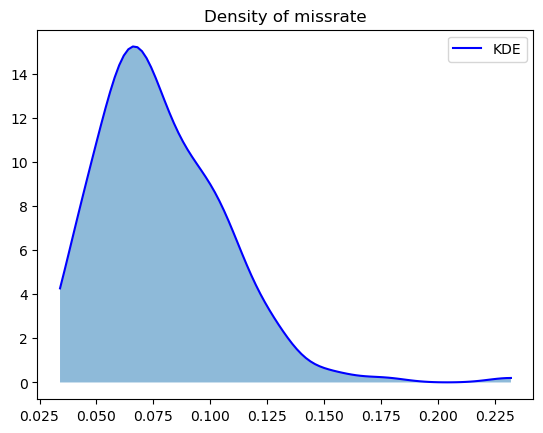

[0.00385413 0.01261522 0.00808704 0.00452996 0.00309629 0.00322265
 0.00703179 0.0055199  0.00454937 0.0021119  0.02354382 0.01273306
 0.00179908 0.01255815 0.00800389 0.0075949  0.01297519 0.01826387
 0.0045578  0.00253618 0.00643902 0.00290532 0.00135769 0.00302403
 0.00917162 0.00132275 0.00309068 0.01449054 0.01158387 0.02202803
 0.00379815 0.0007985  0.00264119 0.00388982 0.01441318 0.0019426
 0.00181551 0.00250949 0.00241021 0.00872722 0.00543941 0.0161448
 0.00291815 0.01291949 0.00530951 0.00516485 0.02222626 0.00167514
 0.00625676 0.01063621 0.00504065 0.00674199 0.00637302 0.00644893
 0.00868767 0.0214124  0.0046284  0.00318958 0.00357805 0.00905237
 0.00918902 0.01712847 0.00632381 0.01993249 0.00895119 0.00329673
 0.01296569 0.01513891 0.00361637 0.00345091 0.01292643 0.00284023
 0.00156577 0.01067517 0.01113865 0.00594516 0.00879662 0.02556069
 0.01112141 0.0020287  0.01319692 0.01533168 0.0067185  0.00641663
 0.00959759 0.0061414  0.01123967 0.00749849 0.01940567 0.005479

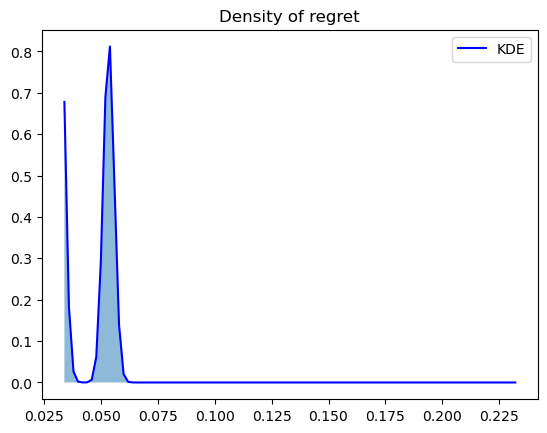

In [3]:
from scipy.stats import gaussian_kde

print(missrate)
print(np.mean(missrate))
# plt.plot(missrate)
kde1 = gaussian_kde(missrate)
xval = np.linspace(min(missrate),max(missrate),100)
yval = kde1(xval)
plt.plot(xval,yval,label='KDE',color='blue')
plt.fill_between(xval,yval,alpha=0.5)
plt.title('Density of missrate')
plt.legend()
plt.show()


print(regret)
# plt.plot(regret)
kde2 = gaussian_kde(regret)
xva2 = np.linspace(min(missrate),max(missrate),100)
yva2 = kde2(xva2)
plt.plot(xva2,yva2,label='KDE',color='blue')
plt.fill_between(xva2,yva2,alpha=0.5)
plt.title('Density of regret')
plt.legend()
plt.show()

In [13]:
import numpy as np
import numpy.random as ndm
import matplotlib.pyplot as plt
from seed import set_seed
from data_generator import gendata_Linear
from data_generator import gendata_Deep
import torch
from log_hazard_binary import g_dnn_bin
from optITR import optITR_deep_bin
import time
#As an example for linear case
patiences = 20
n_node = 64
n_layer = 1
t_nodes = 100
t_fig = 50
n_lr = 1.2e-3
n_epoch = 1000
s_k = 0.1*np.arange(100)  #only focus on interval [0,10]
# beta = np.array([0,-0.5,0.5,-0.25,0.5])
# gamma = np.array([0.5,-0.25,0,0.5,-0.25])
loop = 200

missrate = np.zeros(loop)
regret = np.zeros(loop)
set_seed(114)
test_data = gendata_Deep(500, 0.5)

for i in range(loop):
    set_seed(1145+i)
    print(f"Loop time: {i+1}", end='\r') 
    val_data = gendata_Deep(200, 0.5)
    train_data = gendata_Deep(800, 0.5)
    St = g_dnn_bin(train_data, val_data, test_data, t_nodes, t_fig, s_k, n_layer, n_node, n_lr, n_epoch, patiences,show_val=False)
    S_R_X_ibs = St['S_R_X_untreat']
    S_R_X_ibs1 = St['S_R_X_treated']
    Lambda_R_X_untreat = St['Lambda_R_X_untreat']
    Lambda_R_X_treated = St['Lambda_R_X_treated']
    Cmean_R_X_untreat = St['Cmean_R_X_untreat']
    Cmean_R_X_treated = St['Cmean_R_X_treated']
    ditr = optITR_deep_bin(test_data,Cmean_R_X_treated, Cmean_R_X_untreat)
    missrate[i] = ditr['mis_rate']
    regret[i] = ditr['Regret']
    # time.sleep(1)
print('Results:')
print(np.mean(missrate))
print(np.std(missrate))
print(np.mean(regret))
print(np.std(regret))

Results:e: 200
0.11793000000000003
0.03420080554606865
0.02199163487002207
0.011286234125189613
